[[-1.3474603 ]
 [ 0.3523434 ]
 [ 0.9546986 ]
 [ 0.03592805]
 [ 0.04800625]
 [ 0.04860301]
 [ 0.72334161]
 [ 0.80208661]
 [-1.14379857]
 [ 0.17941071]]
[-126.24922409   50.92876904   63.15463302    6.05472009   -5.72954025
   -2.75191769   58.70355923   53.81362958  -95.34105851   24.64812471]


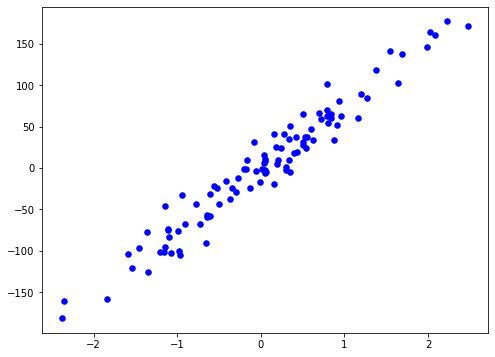

MSE 380.1347218685745


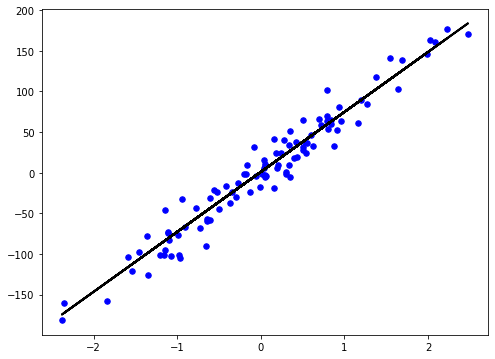

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn import datasets
import matplotlib.pyplot as plt


#######################################
#(0.35   -  0.41)   = 0.06
## mean squared error


def mse(y_true, y_pred):
    return np.mean(     (y_true - y_pred)**2       )


#######################################

def predict(X, weights, bias):
    y_pred = np.dot(    X, weights     ) + bias
    return y_pred

#######################################

def fit(X, y):
    lr = 0.001
    n_iters = 10000
    n_samples, n_features = X.shape  
    
    weights = np.zeros(n_features)
    bias = 0
    
    # gradient descent
    for _ in range(n_iters):
        y_pred = np.dot(   X, weights   ) + bias  
        
        ## compute gradients
        dw = (1/ n_samples) * np.dot(  X.T ,  (y_pred - y ))
        db = (1/ n_samples) * np.sum(   y_pred - y   )
        
        ## update parameters using the gradients
        weights = weights - lr * dw
        bias    = bias - lr * db
    return weights, bias


#######################################

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#######################################

print(X[:10, :]) 
print(y[:10])

#######################################

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

######################################


weights, bias  = fit(X_train, y_train)
y_pred = predict(X_test, weights, bias)

mse_results = mse(y_test, y_pred)
print("MSE", mse_results)

#####################################

y_pred_line = predict(X, weights, bias)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="pred")
plt.show()


